<a href="https://colab.research.google.com/github/nirajkulkarni3605-nie/machine-learning-lab/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully
     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtyp

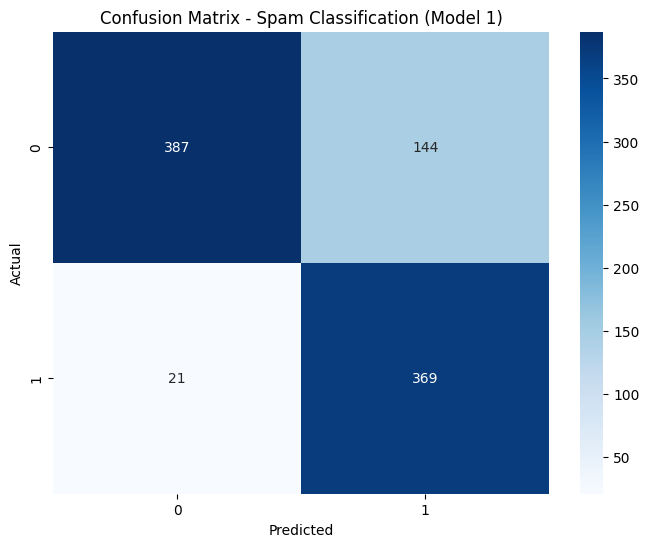

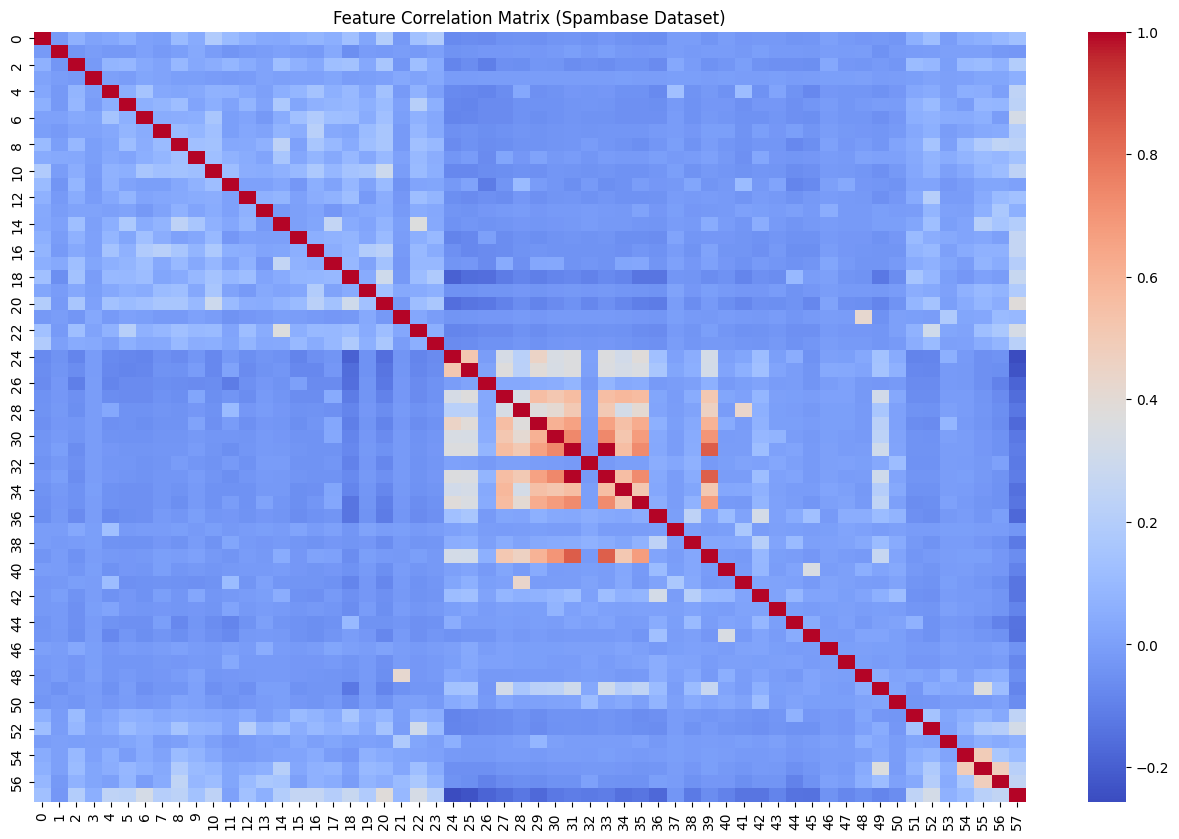

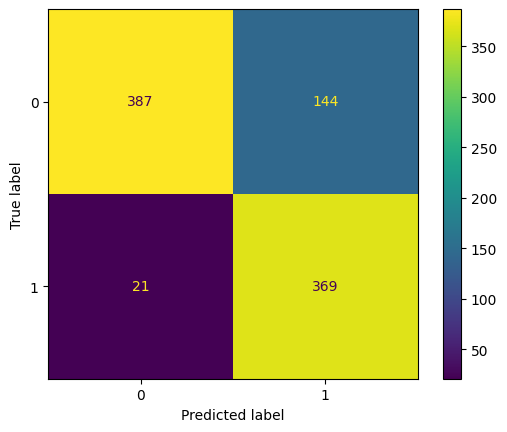

In [1]:
# Open In Colab

# 📌 Spam Classification using Gaussian Naive Bayes (Model 1)
# Dataset: UCI Spambase
# Label: 1 → Spam, 0 → Not Spam (Ham)
# -----------------------------------------------------------
# Model Evaluation Summary:
# - GaussianNB model trained on full dataset features.
# - Achieved ~82% accuracy.
# - Precision/Recall tradeoff:
#   - Higher recall for spam (detects most spam)
#   - Some false positives (valid emails marked as spam)
# -----------------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
df = pd.read_csv(url, header=None)

print("✅ Dataset Loaded Successfully")
print(df.head(), "\n")
print(df.info(), "\n")

# Split data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("Spam/Ham Distribution:\n", y.value_counts(), "\n")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Spam Classification (Model 1)")
plt.show()

# Visualize Correlation Matrix
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix (Spambase Dataset)")
plt.show()

# Display Confusion Matrix using sklearn display
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()
